We will perform CNN on Credit Card Dataset to check whether the transactions are fraud or not.

In [2]:
# import the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# import the dataset
data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# check the shape of the dataset
data.shape

(284807, 31)

Here there are 31 columns and the last column is the target variable named Class

In [6]:
# we will check if there are any null values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there is no null value in the dataset

We will check the datatype of the values in all columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

from observing the dataset and from the info, we can see that our target column consists of values consisting 0 and 1.

In [8]:
# we can check that how many values are present in the 'class' having values as 0 or 1
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here there are legitimate 284315 transactions and the transactions which are fraud are only 492.

So we can say that data is highly imbalanced, we will balance the dataset

* Balancing the dataset 

In [9]:
# dividing the dataframe into fraud and non fraud data
non_fraud=data[data['Class']==0]
fraud=data[data['Class']==1]

In [10]:
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

We are going to make the non_fraud data frame of the same size of the fraud.shape to match the entries, 

In [11]:
# now we are going to select the 492 non-fraud entries from the dataframe 
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

Now that we have data that is balanced, we will merge the dataset of non_fraud and fraud transactions

In [12]:
data=fraud.append(non_fraud, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,94645.0,-0.177791,2.015684,0.698579,4.342671,1.069920,0.160957,1.224658,-0.921429,0.347654,...,0.050687,1.155282,-0.053105,-0.068545,-1.292806,0.239198,-0.155533,-0.204756,3.79,0
980,77963.0,1.016244,-0.724168,0.774948,-1.042371,-0.483539,1.499550,-1.120416,0.804575,1.786854,...,0.140394,0.690910,0.098307,-1.038407,0.101478,-0.569917,0.150773,0.006894,1.00,0
981,71015.0,-0.455444,0.888372,1.522862,1.655510,0.491529,-0.129539,0.614695,-0.018435,-1.500158,...,0.157092,0.400061,-0.005504,0.157245,-0.479995,1.065331,0.064186,0.136427,30.39,0
982,164663.0,1.984913,-0.080749,-1.046421,0.353968,-0.088730,-0.951395,0.151128,-0.202543,0.471931,...,-0.193650,-0.443628,0.286259,0.045911,-0.157942,-0.609962,-0.014828,-0.057288,9.99,0


Now we can say that the data is balanced now and concated

In [13]:
# now let us again check the value counts
data.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

In [15]:
# now dividing the dataframe into dependent and independent varaible
X=data.drop(['Class'], axis=1)
y=data.Class

# check the shape
X.shape, y.shape

((984, 30), (984,))

In [19]:
# we will divide the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=99)

# check the shape again
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((787, 30), (197, 30), (787,), (197,))

In [16]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
518,42317.0,-0.948583,1.012133,1.454900,0.919070,-0.220446,-0.051914,0.799839,-0.884719,-0.619444,...,-0.179423,0.839384,-0.022286,-0.257925,0.002473,0.549348,-0.111245,0.176815,0.040701,120.40
101,36170.0,-5.685013,5.776516,-7.064977,5.902715,-4.715564,-1.755633,-6.958679,3.877795,-5.541529,...,0.299489,1.128641,-0.962960,-0.110045,-0.177733,-0.089175,-0.049447,0.303445,0.219380,111.70
952,218.0,1.201989,-0.034452,0.696628,0.956746,-0.005827,1.095223,-0.574524,0.243435,0.788419,...,-0.031041,-0.109658,-0.011904,-0.166958,-1.295060,0.570793,-0.296854,0.094955,0.024008,12.99
269,84694.0,-4.868108,1.264420,-5.167885,3.193648,-3.045621,-2.096166,-6.445610,2.422536,-3.214055,...,0.667310,1.269205,0.057657,0.629307,-0.168432,0.443744,0.276539,1.441274,-0.127944,12.31
512,14440.0,1.184430,-0.214658,0.695499,0.096276,-0.561550,0.112614,-0.729982,0.192079,1.727943,...,-0.191064,-0.027060,0.109889,-0.019225,-0.320632,0.096454,1.068537,-0.087083,-0.014460,14.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,75455.0,-0.832757,0.723793,1.556898,-1.304189,0.564000,-0.313753,0.928103,0.033233,-0.765745,...,-0.025468,0.059830,0.232433,-0.378386,0.128009,0.503589,1.027027,-0.068378,0.022133,10.30
168,51155.0,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,...,0.860912,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,99.99
185,56650.0,-8.762083,2.791030,-7.682767,6.991214,-5.230695,-0.357388,-9.685621,1.749335,-4.495679,...,-0.460390,-0.090527,0.348590,0.051132,-0.415430,0.219665,0.330020,-0.028252,-0.156270,7.52
35,13323.0,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1.00


We can see that our data is highly varied, we need to scale our data.

We will scale our data using Standard Scaler

In [20]:
# scaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [18]:
X_train,y_train

(array([[-0.93127475,  0.26500376, -0.21795755, ...,  0.08348286,
         -0.01403569,  0.05285039],
        [-1.06016101, -0.6172326 ,  1.08362271, ...,  0.20834217,
          0.43679024,  0.01587929],
        [-1.81397898,  0.66558249, -0.50387363, ...,  0.00276709,
         -0.05615369, -0.40359401],
        ...,
        [-0.6307498 , -1.1903864 ,  0.26801884, ..., -0.11871768,
         -0.51101299, -0.42683906],
        [-1.53920193, -0.57427002,  1.7695758 , ...,  1.46184241,
          1.92376433, -0.45454614],
        [ 0.85463977,  0.78555595, -0.34689766, ..., -0.11185669,
         -0.21766901, -0.42662658]]),
 518    0
 101    1
 952    0
 269    1
 512    0
       ..
 713    0
 168    1
 185    1
 35     1
 641    0
 Name: Class, Length: 787, dtype: int64)

y_train,y_test are in series , we will convert the same into an array

In [21]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [22]:
X_train.shape

(787, 30)

Here we will have to change the shape so that our model can process the data

In [23]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# check the shape again
X_train.shape, X_test.shape

((787, 30, 1), (197, 30, 1))

Now we will build our model

In [24]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout

In [26]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [27]:
# summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [28]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
%%time
# fitting the model
history=model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
25/25 [==============================] - 0s 17ms/step - loss: 2.4206 - accuracy: 0.8107 - val_loss: 1.8587 - val_accuracy: 0.7513
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 1.6364 - accuracy: 0.8780 - val_loss: 0.7135 - val_accuracy: 0.9036
Epoch 3/20
25/25 [==============================] - 0s 9ms/step - loss: 1.2794 - accuracy: 0.9072 - val_loss: 0.9121 - val_accuracy: 0.9188
Epoch 4/20
25/25 [==============================] - 0s 8ms/step - loss: 1.3148 - accuracy: 0.9047 - val_loss: 0.5998 - val_accuracy: 0.9391
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 1.0837 - accuracy: 0.9276 - val_loss: 0.7987 - val_accuracy: 0.7919
Epoch 6/20
25/25 [==============================] - 0s 8ms/step - loss: 1.1632 - accuracy: 0.9187 - val_loss: 0.6969 - val_accuracy: 0.8376
Epoch 7/20
25/25 [==============================] - 0s 9ms/step - loss: 1.2035 - accuracy: 0.9187 - val_loss: 2.7649 - val_accuracy: 0.5635
Epoch 8/20
25/25 [=

In [30]:
# plot
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

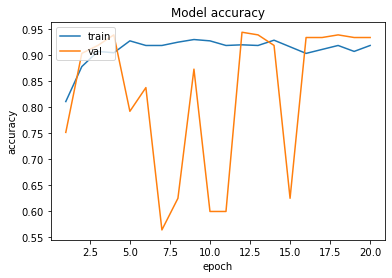

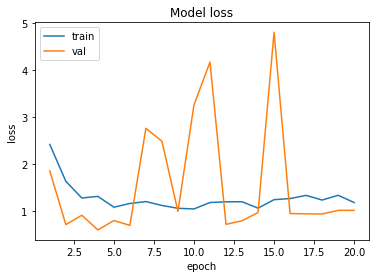

In [31]:
plot_learningcurve(history,20)

In [32]:
# Evaluate the model on the test data
accuracy = model.evaluate(X_test, y_test)[1]

# Print the accuracy percentage
print(f'Accuracy: {accuracy * 100:.2f}%')

7/7 [==============================] - 0s 3ms/step - loss: 1.0170 - accuracy: 0.9340
Accuracy: 93.40%
